In [1]:
import numpy as np
import pandas as pd

In [2]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        n_sample, n_feature = X.shape
        self.weight = np.zeros(n_feature)
        self.bias = 0
        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.weight) + self.bias
            dw = (1 / n_sample) * np.dot(X.T, (y_pred - y))
            db = (1 / n_sample) * np.sum((y_pred - y))
            self.weight -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weight) + self.bias

#### test my model

In [3]:
df=pd.read_csv("Salary_dataset (1).csv")

In [4]:
X = df[['YearsExperience']]
y=df['Salary']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
model=LinearRegression(lr=0.01,n_iter=500)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [7]:
y_pred

array([ 38915.84658365,  66202.55526457,  81483.11212589,  33458.50484747,
       131690.65609879, 129507.71940431])

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)

In [14]:
accuracy

0.9696565728407867

In [15]:
root=root_mean_squared_error(y_test,y_pred)
root

5950.686933121604

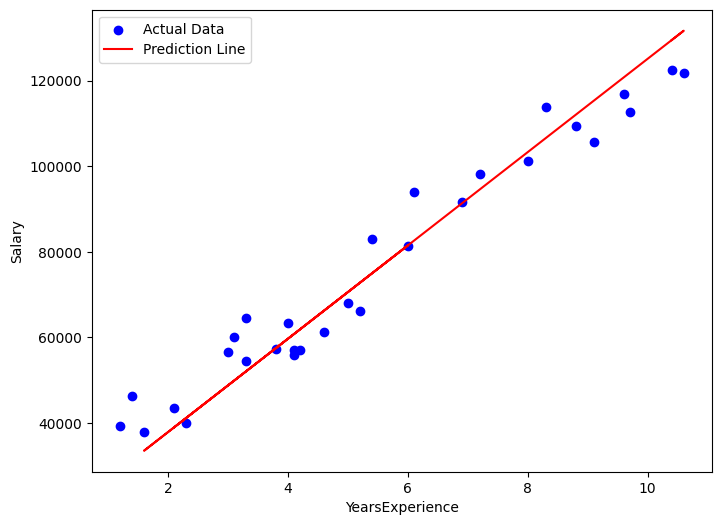

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label="Actual Data")

plt.plot(X_test, y_pred, color='red', label="Prediction Line")

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()
